# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you will be able to present to future employers. One is a brief one-page summary of this project that you will present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Based on your prior coursework, select one method to complete this project: use either a regression model or a machine learning model to predict whether an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


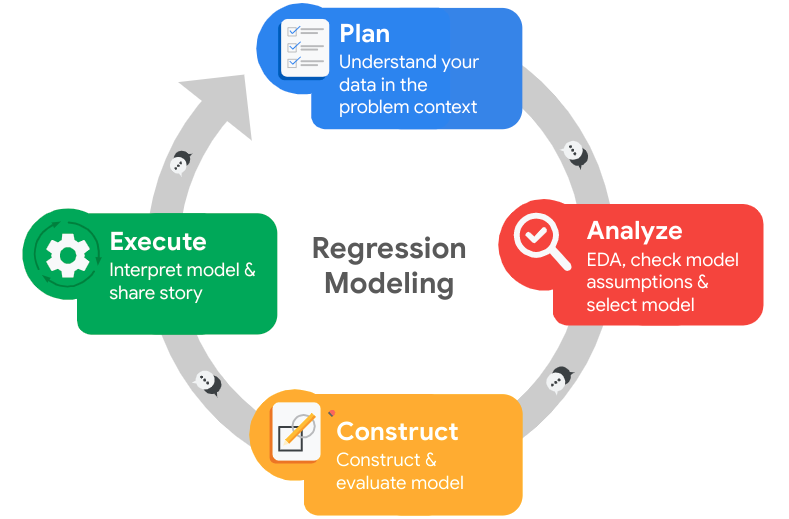

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]
1. The senior leadership team, Human Resources Department

2. Select either a regression model or a tree-based machine learning model to predict whether
an employee will leave the company.

3. We have 14999 data points, 10 columns, some columns are miss-spelled, we dont have any
missing values, we have 3008 rows containing duplicates and 824 rows containing outliers; the
majority of employees in this dataset spend 3-4 years in the company.

4. Pandas as pd, matplotlib, seaborn and numpy.

5. Not at the moment

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 

# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for Logistic Regression & Confusion Matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

# Import packages for data modeling
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance
from xgboost import plot_importance

# This module lets us save our models once we fit them.
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###

df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###

df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###

print(df0.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


In [6]:
# Rename columns as needed
### YOUR CODE HERE ###

df0.columns = [    
'satisfaction_level',         # no change
'last_evaluation',            # no change  
'number_project',             # no change
'average_monthly_hours',      # corrected spelling
'time_spent_at_company',      # made more concise and clear
'work_accident',              # consistent lower case
'left',                       # no change
'promotion_last_5_years',     # made consistent with snake_case
'department',                 # consistent lower case
'salary'                      # no change
]

# Display all column names after the update
### YOUR CODE HERE ###
print(df0.columns)


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spent_at_company', 'work_accident',
       'left', 'promotion_last_5_years', 'department', 'salary'],
      dtype='object')


### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###

df0.isnull().sum()

satisfaction_level        0
last_evaluation           0
number_project            0
average_monthly_hours     0
time_spent_at_company     0
work_accident             0
left                      0
promotion_last_5_years    0
department                0
salary                    0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###

df0.duplicated().sum()


3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###

df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_at_company,work_accident,left,promotion_last_5_years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###

df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###

df1.head(10)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_at_company,work_accident,left,promotion_last_5_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

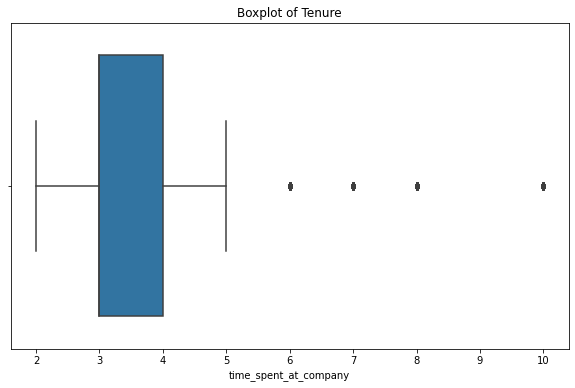

In [11]:
# Create a boxplot to visualize distribution of `time_spend_company` and detect any outliers
### YOUR CODE HERE ###

plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['time_spent_at_company'])
plt.title('Boxplot of Tenure')
plt.xlabel('time_spent_at_company')
plt.show()

In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

if 'time_spent_at_company' in df1.columns:
    
    # Calculate the IQR
    Q1 = df1['time_spent_at_company'].quantile(0.25)
    Q3 = df1['time_spent_at_company'].quantile(0.75)
    IQR = Q3- Q1
    
    # Determine outlier thresholds
    lower_bound = Q1- 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter rows with outliers
    outliers = df1[(df1['time_spent_at_company'] < lower_bound) | (df1['time_spent_at_company'] > upper_bound)]
    
    # Count the number of rows with outliers
    num_outliers = outliers.shape[0]
    
    print(f'Number of rows containing outliers: {num_outliers}')

Number of rows containing outliers: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

  • Overall employees stay between 2 to 5 years

83% of employees stay vs 17% who left 

The higher the average number of projects that the employee accomplished, the more employees who left.

Even employees that left reached a satisfaction level over 70%. satisfaction ranges between 20%
80% approx. employees that stayed show levels 40%- 80%. employees that left 20%- 70%. Overall
the average satisfaction level is lower for employees that left.

The average last evaluation score is higher in employees that left.

Employees with more steady average monthly hours, tend to stay more, than employees having
average monthly hours peaks.

Employees with a low and medium salary level tend to stay longer than employees with high salary
level. is it because the higher the salary the more aggressive goals?, more results pressure?, poor
work-life balance?

The sales, technical and support departments, are among the ones, that have more employees
leaving.

  • The data has outliers ( 824 rows ), and it is skewed to the right.

   I renamed columns for better readibility, encoded the non-numeric variables, There are two:
   department and salary. department is a categorical variable, which means we can dummy it
   for modeling; salary is categorical too, but it’s ordinal. There’s a hierarchy to the categories,
   so it’s better not to dummy this column, but rather to convert the levels to numbers, 0–2.

All of this because binomial logistic regression suits the task because it involves binary classification,
as well as Random Forest and XGBoost models.

  • I renamed columns for better readibility, encoded the non-numeric variables, There are two:
    Understanding the Data Distribution Detecting Outliers and Anomalies Identifying Miss
    ing Data Understanding Relationships Between Variables Detecting Class Imbalance Feature
    Selection and Engineering Insights Understanding Data Quality Checking Assumptions for
    Specific Models

  • Pandas, numpy, matplotlib,
  
  • Not at the moment


## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts(normalize=True) * 100)

0    10000
1     1991
Name: left, dtype: int64
0    83.39588
1    16.60412
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

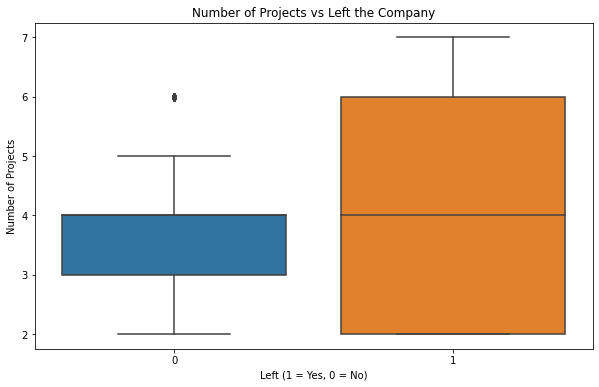

In [14]:
# Create a plot as needed
### YOUR CODE HERE ###

# Bar plot of number of projects distribution for employees who left vs. stayed
plt.figure(figsize=(10,6))
sns.boxplot(x='left', y='number_project', data=df1)
plt.title('Number of Projects vs Left the Company')
plt.xlabel('Left (1 = Yes, 0 = No)')
plt.ylabel('Number of Projects')
plt.show()

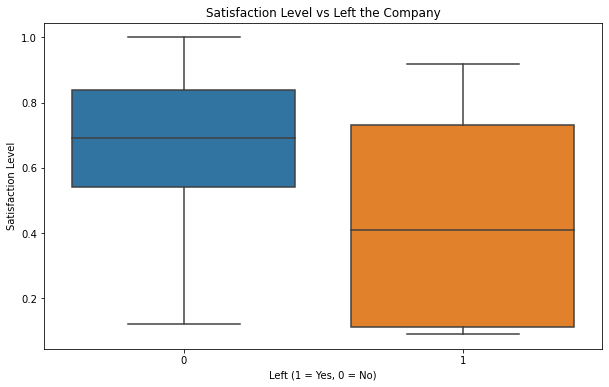

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###

# Boxplot to show distribution of satisfaction levels for employees who left vs stayed
plt.figure(figsize=(10,6))
sns.boxplot(x='left', y='satisfaction_level', data=df1)
plt.title('Satisfaction Level vs Left the Company')
plt.xlabel('Left (1 = Yes, 0 = No)')
plt.ylabel('Satisfaction Level')
plt.show()

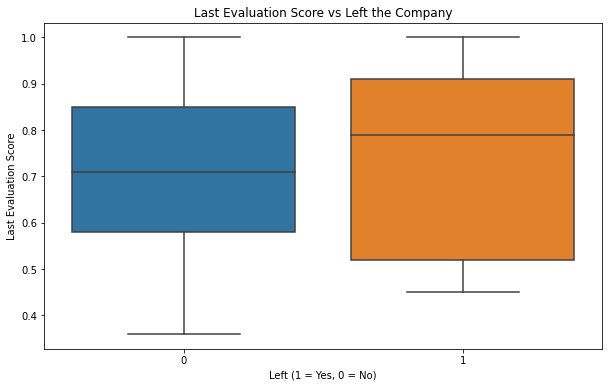

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###

# Boxplot to visualize the relationship between last evaluation score and whether employees left
plt.figure(figsize=(10,6))
sns.boxplot(x='left', y='last_evaluation', data=df1)
plt.title('Last Evaluation Score vs Left the Company')
plt.xlabel('Left (1 = Yes, 0 = No)')
plt.ylabel('Last Evaluation Score')
plt.show()

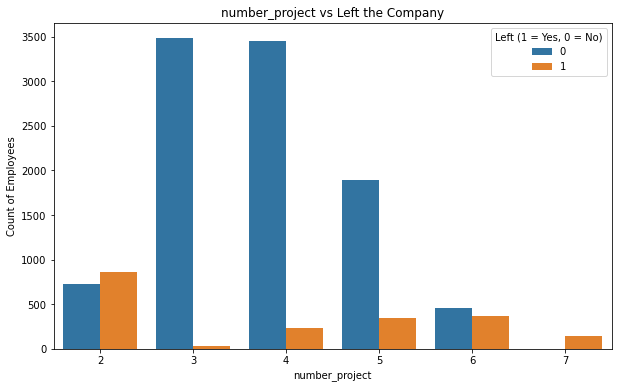

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###

# Bar plot for number of projects and whether employees left
plt.figure(figsize=(10,6))
sns.countplot(x='number_project', hue='left', data=df1)
plt.title('number_project vs Left the Company')
plt.xlabel('number_project')
plt.ylabel('Count of Employees')
plt.legend(title='Left (1 = Yes, 0 = No)')
plt.show()

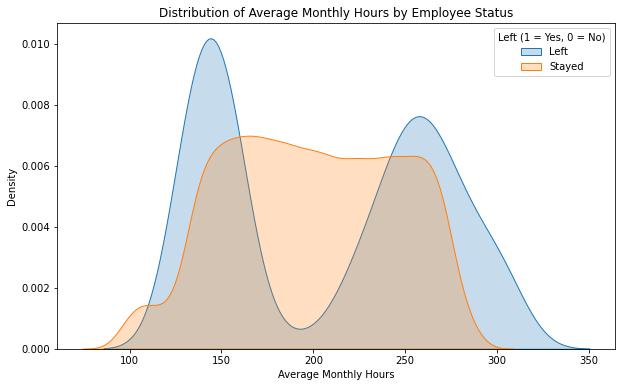

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###

# KDE (Kernel Density Estimate) plot for the distribution of average monthly hours
plt.figure(figsize=(10,6))
sns.kdeplot(df1[df1['left'] == 1]['average_monthly_hours'], label='Left', shade=True)
sns.kdeplot(df1[df1['left'] == 0]['average_monthly_hours'], label='Stayed', shade=True)
plt.title('Distribution of Average Monthly Hours by Employee Status')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Density')
plt.legend(title='Left (1 = Yes, 0 = No)')
plt.show()

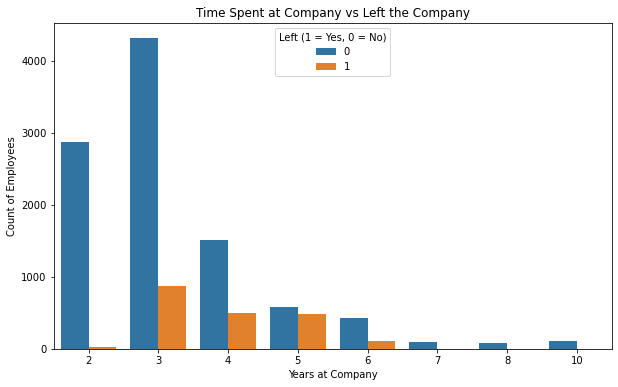

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###

# Bar plot for time spent at company and leaving the company
plt.figure(figsize=(10,6))
sns.countplot(x='time_spent_at_company', hue='left', data=df1)
plt.title('Time Spent at Company vs Left the Company')
plt.xlabel('Years at Company')
plt.ylabel('Count of Employees')
plt.legend(title='Left (1 = Yes, 0 = No)')
plt.show()

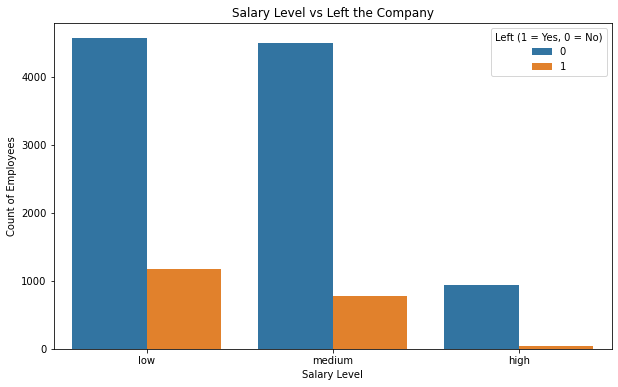

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###

# Bar plot to visualize the relationship between salary level and leaving the company
plt.figure(figsize=(10,6))
sns.countplot(x='salary', hue='left', data=df1)
plt.title('Salary Level vs Left the Company')
plt.xlabel('Salary Level')
plt.ylabel('Count of Employees')
plt.legend(title='Left (1 = Yes, 0 = No)')
plt.show()

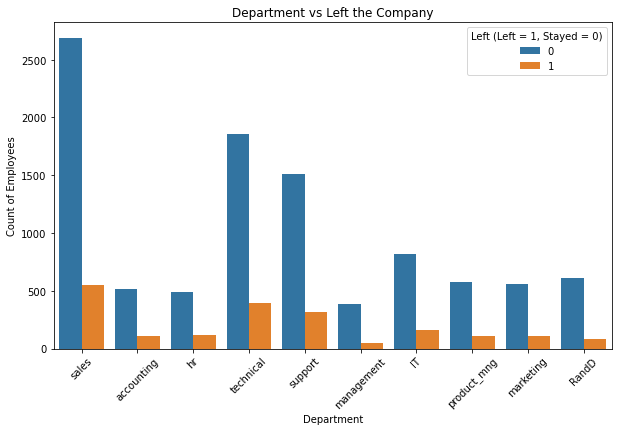

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###

# Bar plot for department and leaving the company
plt.figure(figsize=(10,6))
sns.countplot(x='department', hue='left', data=df1)
plt.title('Department vs Left the Company')
plt.xlabel('Department')
plt.ylabel('Count of Employees')
plt.legend(title='Left (Left = 1, Stayed = 0)')
plt.xticks(rotation=45)
plt.show()

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]


- Overall employees stay between 2 to 5 years


- 83% of employees stay vs 17% who left
The higher the average number of projects that the employee accomplished, the more employees
who left.


- Even employees that left reached a satisfaction level over 70%. satisfaction ranges between 20%
80% approx. employees that stayed show levels 40%- 80%. employees that left 20%- 70%. Overall
the average satisfaction level is lower for employees that left.


- The average last evaluation score is higher in employees that left.


- Employees with more steady average monthly hours, tend to stay more, than employees having
average monthly hours peaks.


- Employees with a low and medium salary level, tend to stay longer than employees with high salary
level. is it because the higher the salary the more aggressive goals?, more results pressure?, poor
work-life balance?


- The sales, technical and support departments, are among the ones, that have more employees
leaving.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

• Even employees that left reached a satisfaction level over 70%. satisfaction ranges between
20%- 80% approx. employees that stayed show levels 40%- 80%. employees that left 20%
70%. Overall the average satisfaction level is lower for employees that left. Employees with
a low and medium salary level, tend to stay longer than employees with high salary level.
is it because the higher the salary the more aggressive goals?, more results pressure?, poor
work-life balance?

• I chose all of the variables, the left column was the target variable, and the rest were
predictors.
I also added a variable called, burnout_risk:Combining number_project,
time_spent_at_company, and average_monthly_hours, we created a new feature that flags
employees with a high workload (many projects and hours) and shorter tenure, which may
indicate burnout.

• Yes

• The Random forest model without feature engineering has the highest recall of all, 92.99%,
meaning that it is the best at predicting employees that would leave, which means that it
makes a lot of true positive predictions and capture employees who will leave.

• We tried the Logistic regression model with the new independent variable, (burnout_risk),
only had a recall of 28%, although the feature importance graph, showed that, burnout_risk
21
has a strong positive correlation with employees leaving. do more feature engineering to
uncover relationships between, motivation factors, work_life balance, monthly hours, etc.,
this would help know what determines satisfaction_levels. Maybe gather new data, and
make the satisfaction_level feature the target variable; and compare those results with the
older data wiht the ‘left’ variable as the target variable. the idea is to know what determines
those satisfaction levels with detail.

• from sklearn.model_selection import GridSearchCV, train_test_split from sklearn.metrics
import roc_auc_score, roc_curve, auc from sklearn.metrics import accuracy_score,
precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay from
sklearn.ensemble import RandomForestClassifier from xgboost import XGBClassifier from
sklearn.linear_model import LogisticRegression

• Not at the moment


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

Design a model that predicts whether an employee will leave the company based on their depart
ment, number of projects, average monthly hours, and any other data points you deem helpful.

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

Logistic Regression: Simple, interpretable, and useful as a baseline.Assumes linear relationships
between features and the target variable.

Given the task of predicting a binary outcome (whether an employee will leave or not), a tree
based machine learning model like RandomForest or XGBoost is a strong choice. These models
handle a variety of data types, capture complex patterns, and offer interpretability through feature
importance, helping the company understand the most significant factors in turnover.

## LOGISTIC REGRESSION

### Modeling

Add as many cells as you need to conduct the modeling process.

Assumptions for LOGISTIC REGRESION:

• Independent observations (This refers to how the data was collected.)

• No extreme outliers

• Little to no multicollinearity among X predictors

• Linear relationship between X and the logit of y

For the first assumption, you can assume that observations are independent for this project.

The last assumption will be verified after modeling.

Note: In practice, modeling assumptions are often violated, and depending on the specifics of your
use case and the severity of the violation, it might not affect your model much at all or it will result
in a failed model.


In [22]:
### YOUR CODE HERE ###

# Logistic Regression Model

# Generate a correlation matrix
df1.corr(method='pearson')

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_at_company,work_accident,left,promotion_last_5_years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_monthly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
time_spent_at_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5_years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


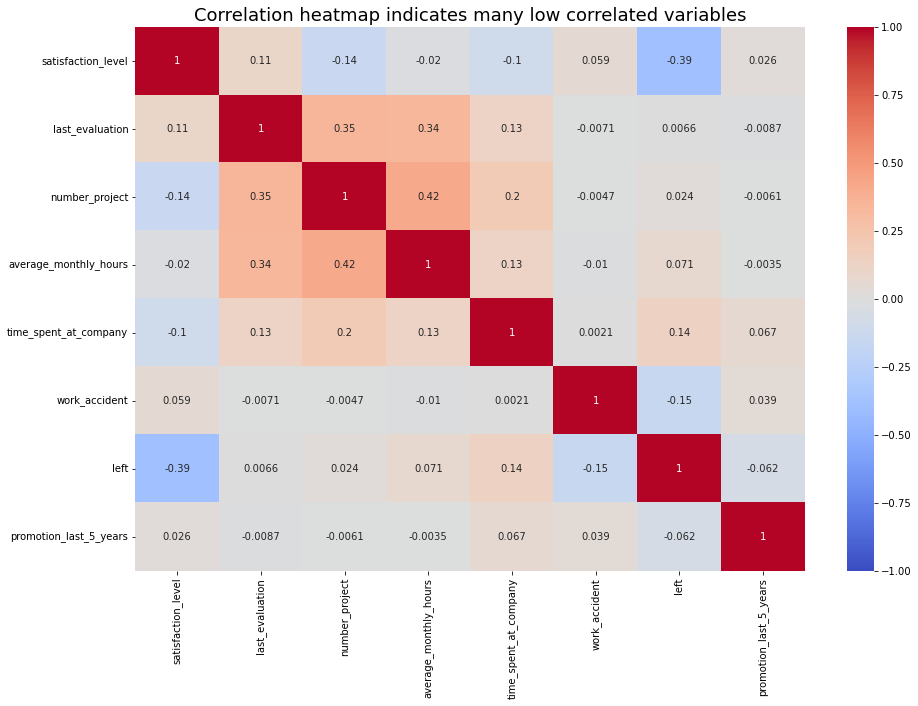

In [23]:
# Plot the correlation heatmap
plt.figure(figsize=(15,10))

sns.heatmap(df0.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables', fontsize=18)
plt.show();

If there are predictor variables that have a Pearson correlation coefficient value greater than the
absolute value of 0.7, these variables are strongly multicollinear. Therefore, only one of these
variables should be used in your model.

For this particular case we dont have multicollinearity beteween X variables.

There are several non-numerical variables (object data types) within the dataset. To prepare this
DataFrame for modeling, first convert these variables into a numerical format.

Note that binomial logistic regression suits the task because it involves binary classification.

Before splitting the data, encode the non-numeric variables. There are two: department and salary.

department is a categorical variable, which means you can dummy it for modeling.

salary is categorical too, but it’s ordinal. There’s a hierarchy to the categories, so it’s better not
to dummy this column, but rather to convert the levels to numbers, 0–2.

In [24]:
# Copy the dataframe
df_enco = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enco['salary'] = (df_enco['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes)

# Dummy encode the `department` column
df_enco = pd.get_dummies(df_enco, drop_first=False)

# Display the new dataframe
df_enco.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_at_company,work_accident,left,promotion_last_5_years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


We are going to remove outliers for improving model performance

In [25]:
# Select rows without outliers in `time_spent_at_company` and save resulting dataframe in a new variable
df_logir = df_enco[(df_enco['time_spent_at_company'] >= lower_bound) & (df_enco['time_spent_at_company'] <= upper_bound)]

# Display first few rows of new dataframe
df_logir.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_at_company,work_accident,left,promotion_last_5_years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [26]:
# Isolate target variable
y = df_logir['left']

In [27]:
# Isolate predictor variables
X = df_logir.drop('left', axis=1)

Split the data Use scikit-learn’s train_test_split() function to perform a train/test split on your
data using the X and y variables you assigned above.

In [28]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Use scikit-learn to instantiate a logistic regression model. Add the argument penalty = None. It is
important to add penalty = ‘none’ since your predictors are unscaled.

In [29]:
%%time
#Fit the model on X_train and y_train
model = LogisticRegression(penalty='none', max_iter=400)

model.fit(X_train, y_train)


CPU times: user 33.8 s, sys: 42.7 s, total: 1min 16s
Wall time: 38.2 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

We will call the .coef_ attribute on the model to get the coefficients of each variable. The coefficients
are in order of how the variables are listed in the dataset. Remember that the coefficients represent
the change in the log odds of the target variable for every one unit increase in X. If you want, create
a series whose index is the column names and whose values are the coefficients in model.coef_.

In [30]:
pd.Series(model.coef_[0], index=X.columns)

satisfaction_level       -4.467049
last_evaluation           0.091955
number_project           -0.496495
average_monthly_hours     0.003568
time_spent_at_company     1.104990
work_accident            -1.543696
promotion_last_5_years   -1.328199
salary                   -0.524042
department_IT            -0.086194
department_RandD         -0.351762
department_accounting    -0.316661
department_hr            -0.038655
department_management    -0.227436
department_marketing     -0.138906
department_product_mng   -0.137413
department_sales          0.018568
department_support        0.010465
department_technical      0.001768
dtype: float64

Call the model’s intercept_ attribute to get the intercept of the model.

In [31]:
model.intercept_

array([-1.266226])

Check final assumption Verify the linear relationship between X and the estimated log odds (known
as logits) by making a regplot. Call the model’s predict_proba() method to generate the probability
of response for each sample in the training data. (The training data is the argument to the method.)
Assign the result to a variable called training_probabilities. This results in a 2-D array where each
row represents a user in X_train.

The first column is the probability of the employee not leaving, and the second column is the
probability of the employee leaving.

In [32]:
#Get the predicted probabilities of the training data
training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.80669113, 0.19330887],
       [0.99400689, 0.00599311],
       [0.9981932 , 0.0018068 ],
       ...,
       [0.91073022, 0.08926978],
       [0.95715862, 0.04284138],
       [0.98218787, 0.01781213]])

In logistic regression, the relationship between a predictor variable and the dependent variable does
not need to be linear, however, the log-odds (a.k.a., logit) of the dependent variable with respect
to the predictor variable should be linear. Here is the formula for calculating log-odds, where p is

the probability of response: logit(p) = ln(p/1 − p)
1. Create a dataframe called logit_data that is a copy of df1.
2. Create a new column called logit in the logit_data dataframe. The data in this column should
represent the logit for each employee

In [33]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df1
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

Plot a regplot where the x-axis represents all the independent variables and the y-axis represents
the log-odds of the predicted probabilities.

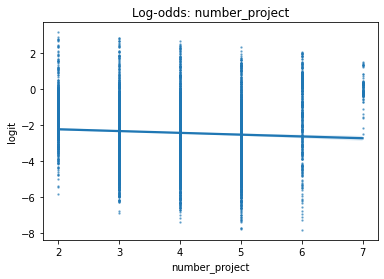

In [34]:
# Plot regplot of `activity_days` log-odds
sns.regplot(x='number_project', y='logit', data=logit_data, scatter_kws={'s':2,'alpha': 0.5})
plt.title('Log-odds: number_project');

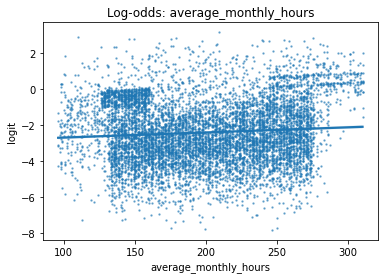

In [35]:
# Plot regplot of `activity_days` log-odds
sns.regplot(x='average_monthly_hours', y='logit', data=logit_data, scatter_kws={'s': 2,'alpha': 0.5})
plt.title('Log-odds: average_monthly_hours');

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



In [36]:
# Generate predictions on X_test
y_preds = model.predict(X_test)

Now, we use the score() method on the model with X_test and y_test as its two arguments. The
default score in scikit-learn is accuracy. What is the accuracy of your model? Consider: Is accuracy
the best metric to use to evaluate this model?

In [37]:
# Score the model (accuracy) on the test data
model.score(X_test, y_test)

0.8216332378223495

Use the confusion_matrix function to obtain a confusion matrix. Use y_test and y_preds as
arguments.

In [38]:
cm = confusion_matrix(y_test, y_preds)

Next, use the ConfusionMatrixDisplay() function to display the confusion matrix from the above
cell, passing the confusion matrix you just created as its argument.

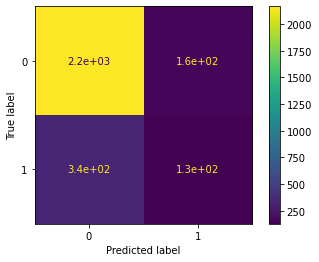

In [39]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot();

The matrix shows that the proportion of true positives, false positives and false negatives is very
low. Meaning the model poorly predicted employees who will leave. Also, the model did not identify
correctly those employees who will leave.

Print out the model’s accuracy, precision, recall, and F1 score.

In [40]:
### YOUR CODE HERE ###
print("Accuracy:", "%.6f" % accuracy_score(y_test, y_preds))
print("Precision:", "%.6f" % precision_score(y_test, y_preds))
print("Recall:", "%.6f" % recall_score(y_test, y_preds))
print("F1 Score:", "%.6f" % f1_score(y_test, y_preds))

Accuracy: 0.821633
Precision: 0.452632
Recall: 0.273885
F1 Score: 0.341270


Accuracy (0.8216): The model is correctly predicting the outcome for about 82% of the data points.

Precision (0.4526): About 45% of the positive predictions (left employees) were correct.

Recall (0.2739): The model correctly identified about 27% of the true positive cases.(employees
that left)

F1 Score (0.3413): The harmonic mean of precision and recall, balancing the trade-off between the
two.

In [41]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_preds, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.45      0.27      0.34       471

                 accuracy                           0.82      2792
                macro avg       0.66      0.60      0.62      2792
             weighted avg       0.79      0.82      0.80      2792



The model shows a normal precision of 45% and low recall of 27% at predicting employees that
would leave, which means that it makes a lot of false negative predictions and fails to capture
employees who will leave.

The weighted avg is 79% for precision, 82% for recall, 80% for f1-score and accuracy is 82%.

Generate a bar graph of the model’s coefficients for a visual representation of the importance of
the model’s features

In [42]:
# Create a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_train.columns, model.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1],reverse=True)
feature_importance

[('time_spent_at_company', 1.104989969396104),
 ('last_evaluation', 0.09195456557449508),
 ('department_sales', 0.018567849091610023),
 ('department_support', 0.010464700032182033),
 ('average_monthly_hours', 0.003567752309797061),
 ('department_technical', 0.0017677981725568814),
 ('department_hr', -0.03865459504642392),
 ('department_IT', -0.0861940119990343),
 ('department_product_mng', -0.13741289806788515),
 ('department_marketing', -0.13890569327147603),
 ('department_management', -0.22743591532839416),
 ('department_accounting', -0.3166608320172086),
 ('department_RandD', -0.35176239896641015),
 ('number_project', -0.49649468452053486),
 ('salary', -0.524042298882285),
 ('promotion_last_5_years', -1.3281987526767787),
 ('work_accident', -1.543695525296883),
 ('satisfaction_level', -4.4670486455492115)]

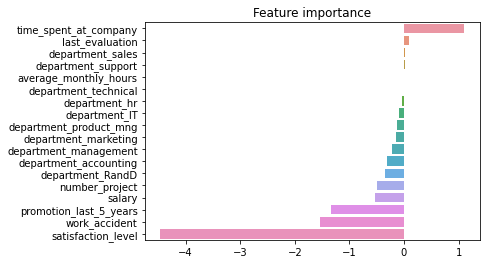

In [43]:
# Plot the feature importances
import seaborn as sns
sns.barplot(x=[x[1] for x in feature_importance],y=[x[0] for x in feature_importance],orient='h')
plt.title('Feature importance');

satisfaction_level was by far the most important feature in the model. It had a negative correlation
with employees who left.

Overall employees stay between 2 to 5 years

83% of employees stay vs 17% who left

The higher the average number of projects that the employee accomplished, the more employees
who left.

Even employees that left reached a satisfaction level over 70%. satisfaction ranges between 20% -

80% approx. employees that stayed show levels 40% - 80%. employees that left 20% - 70%. Overall
the average satisfaction level is lower for employees that left.

## RANDOM FOREST

Assign predictor variables and target

In [44]:
# Isolate target variable
y = df_logir['left']


In [45]:
# Isolate predictor variables
X = df_logir.drop('left', axis=1)

Split the data Use scikit-learn’s train_test_split() function to perform a train/test split on your
data using the X and y variables you assigned above.

In [46]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [47]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [None],
'max_features': [1.0],
'max_samples': [0.8],
'min_samples_leaf': [2],
'min_samples_split': [2],
'n_estimators': [300],
}

# 3. Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='recall')

Now fit the model to the training data.

In [48]:
%%time
rf_cv.fit(X_train, y_train)


CPU times: user 15.9 s, sys: 0 ns, total: 15.9 s
Wall time: 15.9 s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [49]:
### Pickle the model

# pickle.dump(rf_cv, open('rf_cv.sav', 'wb'))

In [50]:
# Read/Load in pickled model

# rf_cv = pickle.load(open('rf_cv.sav', 'rb'))


Examine the best score

In [51]:
# Examine best score
rf_cv.best_score_

0.9092981425444244

Examine the best combination of hyperparameters.

In [52]:
# Examine best hyperparameter combo
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.8,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

Use the make_results() function to output all of the scores of your model. Note that the function
accepts three arguments

In [53]:
def make_results(model_name:str, model_object, metric:str):
    """
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    """
    
    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision','recall': 'mean_test_recall','f1': 'mean_test_f1',
                  'accuracy': 'mean_test_accuracy',}

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],'precision': [precision],'recall': [recall],'f1': [f1],
                'accuracy': [accuracy]})

    return table

Pass the GridSearch object to the make_results() function.

In [54]:
results = make_results('RF cv', rf_cv, 'recall')
results


,model,precision,recall,f1,accuracy
0,RF cv,0.983937,0.909298,0.944991,0.982209


Scores are good. However, recall that when you built the logistic regression model, the recall was
0.27 at predicting employees that would leave, which means that it makes a lot of false negative
predictions and fails to capture employees who will leave.

The recall for the Random Forest model is 90.92%, which is really good for predicting employees
that would leave, with the satisfaction_level feature having a strong negative correlation.

It would be interesting to know what drives satisfaction_levels, will it have a correlation with any
other variables?

## XGBoost


In [55]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [6, 12],
'min_child_weight': [3, 5],
'learning_rate': [0.01, 0.1],
'n_estimators': [50]
}

# 3. Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='recall')

Now fit the model to the X_train and y_train data.

Note this cell might take several minutes to run.

In [56]:
%%time
xgb_cv.fit(X_train, y_train)


CPU times: user 2h 46min 33s, sys: 15.4 s, total: 2h 46min 49s
Wall time: 1h 23min 25s


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=42,
                                     reg_alpha=None, ...),
             iid='deprecate

In [57]:
### Pickle the model

# pickle.dump(xgb_cv, open('xgb_cv.sav', 'wb'))

In [58]:
# Read/Load in pickled model

# xgb_cv = pickle.load(open('xgb_cv.sav', 'rb'))


Get the best score from this model

In [59]:
# Examine best score
xgb_cv.best_score_

0.9078796999742468

And the best parameters.

In [60]:
# Examine best parameters
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 12,
 'min_child_weight': 3,
 'n_estimators': 50}

Use the make_results() function to output all of the scores of your model. Note that the function
accepts three arguments.

In [61]:
# Call 'make_results()' on the GridSearch object
xgb_cv_results = make_results('XGB cv', xgb_cv, 'recall')
results = pd.concat([results, xgb_cv_results], axis=0)
results


,model,precision,recall,f1,accuracy
0,RF cv,0.983937,0.909298,0.944991,0.982209
0,XGB cv,0.976518,0.907880,0.940766,0.980777


Out of the three models the Random Forest has the best recall. we will select that model to predict
on test data. This is to give a final indication of how you should expect the model to perform on
new future data, should we decide to use the model.

##### We will run the RANDOM FOREST model to predict on the test data

In [62]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.
    
    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data
    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
    
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]})
    
    return table

In [63]:
# Use Random Forest model to predict on test data
rf_test_preds = rf_cv.best_estimator_.predict(X_test)

# Get test scores for Random Forest model
rf_test_scores = get_test_scores('RF test', rf_test_preds, y_test)

# Append to the results table
results = pd.concat([results, rf_test_scores], axis=0)
results


,model,precision,recall,f1,accuracy,F1
0,RF cv,0.983937,0.909298,0.944991,0.982209,NaN
0,XGB cv,0.976518,0.907880,0.940766,0.980777,NaN
0,RF test,0.993197,0.929936,NaN,0.987106,0.960526


✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

• like in the logistic regression model, satisfaction_level is the most important feature. which
is probably determined by tenure and number_project . surprisingly, salary does not have
too much weight on the model. The best recall was 92.99% for the RF model predicting on
test data. The best model was Random Forest, that is why chose that one to predict on test
data. The model shows a great precision of 99.31%, recall of 92.99% at predicting employees
that would leave, which means that it makes a lot of true positive predictions and capture
employees who will leave. The recall was even better for the Random Forest model predicting
on the test data set. all of the scores actually improved when predicting on the test data
set. In the feature importance graph, it looks like burnout_risk has a direct correlation with
employees leaving, showing the highest weight among the independent variables with positive
correlation to the target variable. Meaning that the more projects and hours they work, the
more they are prone to leave. and maybe that could lead to lowest satisfaction levels; which
will make employees leave after 3-5 years of working for the company.

• The Logistic model is not a strong enough predictor, as made clear by its poor recall score.
However, if the model is only being used to guide further exploratory efforts, then it can have
value.

• Gather new data, and make the satisfaction_level feature the target variable; and compare
those results with the older data wiht the ‘left’ variable as the target variable. the idea is to
know what determines those satisfaction levels with detail.

• Yes, by doing more feature engineering to uncover relationships between, motivation factors, work_life balance, monthly hours, etc., this would help know what determines satisfaction_levels. It could also be improved by changing hyperparameters among other things.

• It would be interesting to know what drives satisfaction_levels, will it have a correlation with
any other variables?, Employees with a low and medium salary level, tend to stay longer
than employees with high salary level. is it because the higher the salary the more aggressive
goals?, more results pressure?, poor work-life balance?

• from sklearn.metrics import accuracy_score, precision_score, recall_score,
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay from xgboost import plot_importance import pickle

• No

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




Plot a confusion matrix of the champion model’s predictions on the test data.

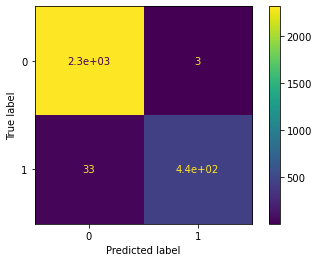

In [64]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, rf_test_preds, labels=rf_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=rf_cv.classes_)
disp.plot();


The matrix shows that the proportion of true positives and false negatives is very low. Meaning
the model poorly predicted employees who will leave. Also, the model did not identify correctly
those employees who will leave.

The model predicted many more times false negatives than it did false positives, and it correctly
identified only 17% of the employees who actually left.

Also, the target was to identify employees that left, and with an imbalanced data set, with 83% of
employees that stayed, vs 17% employees that left, the model identified correctly 17% of employees
that actually left; that is why the matrix shows a high proportion of true negatives. 

Overall employees stay between 2 to 5 years

83% of employees stay vs 17% who left

Use the plot_importance function to inspect the most important features of your final model.

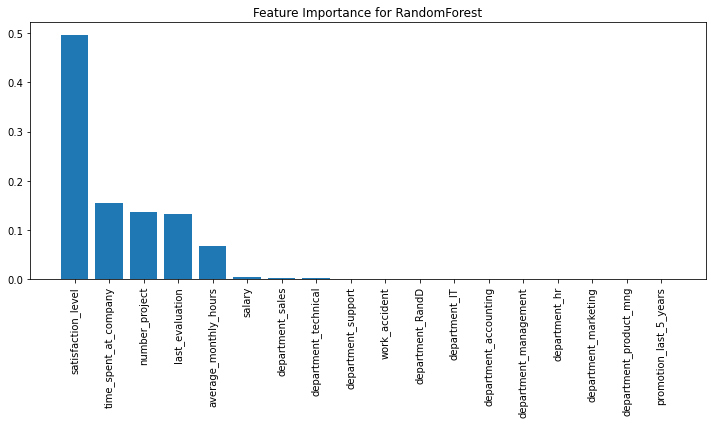

In [65]:
# Get feature importances from the RandomForest model
importances = rf_cv.best_estimator_.feature_importances_
feature_names = X_test.columns

# Sort the importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance for RandomForest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

like in the logistic regression model, satisfaction_level is the most important feature. which is
probably determined by tenure and number_project . surprisingly, salary does not have too much
weight on the model.

Identify an optimal decision threshold

The default decision threshold for most implementations of classification algorithms—including
scikit-learn’s—is 0.5. This means that, in the case of the Salifort models, if they predicted that
a given employee had a 50% probability or greater of leaving, then that employee was assigned a
predicted value of 1—the employee was predicted to leave.

With imbalanced datasets where the response class is a minority, this threshold might not be ideal.
we learned that a precision-recall curve can help to visualize the trade-off between your model’s
precision and recall

Here’s the precision-recall curve for the Random Forest champion model on the test data.

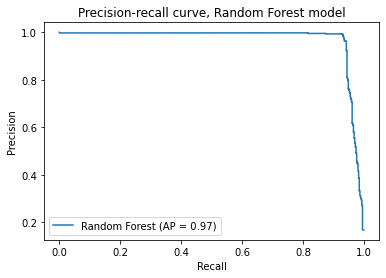

In [66]:
from sklearn.metrics import precision_recall_curve, average_precision_score, PrecisionRecallDisplay

# Get the prediction probabilities for the positive class
y_probs = rf_cv.best_estimator_.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Calculate average precision score
avg_precision = average_precision_score(y_test, y_probs)

# Plot precision-recall curve
display = PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=avg_precision, estimator_name="Random Forest")
display.plot()
plt.title('Precision-recall curve, Random Forest model')
plt.show()

As recall increases precision increases. the threshold is ideal


 ## Feature Engineering

**Burnout Indicator** 
Why: Employees working on many projects for a long time might be more
prone to burnout, which could lead to them leaving the company. How: Define a threshold for
burnout based on both number_project and time_spent_at_company

Combining number_project, time_spend_company, and average_monthly_hours, we could create
a new feature that flags employees with a high workload (many projects and hours) and shorter
tenure, which may indicate burnout.


In [67]:
df_logir['burnout_risk'] = ((df_logir['number_project'] > 5) & (df_logir['average_monthly_hours'] > 250) &
(df_logir['time_spent_at_company'] < 3)).astype(int)

### Logistic Regression 1

In [68]:
#Assign predictor variables and target

# Isolate target variable
y = df_logir['left']

In [69]:
# Isolate predictor variables
X = df_logir.drop(['left','number_project', 'average_monthly_hours', 'time_spent_at_company'], axis=1)

In [70]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [71]:
%%time

#Fit the model on X_train and y_train
model1 = LogisticRegression(penalty='none', max_iter=400)
model1.fit(X_train, y_train)

CPU times: user 7.49 s, sys: 5.96 s, total: 13.4 s
Wall time: 6.69 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
pd.Series(model1.coef_[0], index=X.columns)

satisfaction_level       -4.437574
last_evaluation           0.116478
work_accident            -1.343241
promotion_last_5_years   -1.444538
salary                   -0.509188
department_IT             0.137741
department_RandD         -0.089833
department_accounting    -0.004601
department_hr             0.267050
department_management    -0.022146
department_marketing      0.102394
department_product_mng    0.106173
department_sales          0.202944
department_support        0.182649
department_technical      0.178477
burnout_risk              0.702530
dtype: float64

In [73]:
model1.intercept_

array([1.06084691])

The first column is the probability of the employee not leaving, and the second column is the
probability of the employee leaving.

In [74]:
# Get the predicted probabilities of the training data
training_probabilities = model1.predict_proba(X_train)
training_probabilities

array([[0.74253897, 0.25746103],
       [0.97840651, 0.02159349],
       [0.99003473, 0.00996527],
       ...,
       [0.77745088, 0.22254912],
       [0.86767654, 0.13232346],
       [0.89521018, 0.10478982]])

If the logistic assumptions are met, the model results can be appropriately interpreted. Use the
code block below to make predictions on the test data.


In [75]:
# Generate predictions on X_test
y_preds1 = model1.predict(X_test)

What is the accuracy of your model? Consider: Is accuracy the best metric to use to evaluate this
model?

In [76]:
# Score the model (accuracy) on the test data
model1.score(X_test, y_test)

0.8513610315186246

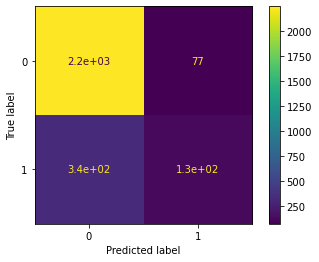

In [77]:
#Use the confusion_matrix function to obtain a confusion matrix. Use y_test and␣ y_preds as arguments.
cm = confusion_matrix(y_test, y_preds1)

#Next, use the ConfusionMatrixDisplay() function to display the confusion matrix from the above cell,

#passing the confusion matrix you just created as its argument.
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot();

The matrix shows a slight improve in the proportion of false positives. other than that it is almost
the same results from the previous logistic regression model.


In [78]:
#Print out the model’s accuracy, precision, recall, and F1 score.

### YOUR CODE HERE ###
print("Accuracy:", "%.6f" % accuracy_score(y_test, y_preds1))
print("Precision:", "%.6f" % precision_score(y_test, y_preds1))
print("Recall:", "%.6f" % recall_score(y_test, y_preds1))
print("F1 Score:", "%.6f" % f1_score(y_test, y_preds1))


Accuracy: 0.851361
Precision: 0.633333
Recall: 0.282378
F1 Score: 0.390602


### Logistic Regression vs Logistic Regresssion 1 Metrics


In [79]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_preds1, target_names=target_names))


                           precision    recall  f1-score   support

Predicted would not leave       0.87      0.97      0.92      2321
    Predicted would leave       0.63      0.28      0.39       471

                 accuracy                           0.85      2792
                macro avg       0.75      0.62      0.65      2792
             weighted avg       0.83      0.85      0.83      2792



The recall only improved by 1%, precision increased almost 20% and accuracy increased by 3%.

Precision improving means the model identified more true positives, although at the same time it
identified more false negatives because recall went from 27% to 28%. maybe the new variable has
a direct correlation with the target variable.

In [80]:
#Generate a bar graph of the model’s coefficients for a visual representation of the importance of the model’s features.

# Create a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_train.columns, model1.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1],reverse=True)
feature_importance

[('burnout_risk', 0.702529584837882),
 ('department_hr', 0.26704965072197984),
 ('department_sales', 0.20294385467735876),
 ('department_support', 0.18264858445718515),
 ('department_technical', 0.17847743334780797),
 ('department_IT', 0.13774128217332166),
 ('last_evaluation', 0.11647766658332616),
 ('department_product_mng', 0.10617271498689056),
 ('department_marketing', 0.10239388262942568),
 ('department_accounting', -0.004601259388966147),
 ('department_management', -0.02214592550310164),
 ('department_RandD', -0.08983331036751918),
 ('salary', -0.5091878636088372),
 ('work_accident', -1.3432409173835773),
 ('promotion_last_5_years', -1.444537885295788),
 ('satisfaction_level', -4.437573880961679)]

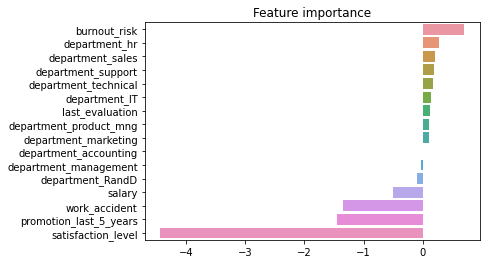

In [81]:
# Plot the feature importances
sns.barplot(x=[x[1] for x in feature_importance],y=[x[0] for x in feature_importance],orient='h')
plt.title('Feature importance');


Looking at the graph above, it looks like burnout_risk has a direct correlation with employees
leaving. Meaning that the more projects and hours they work, the more they are prone to leave.
and maybe that could lead to lowest satisfaction levels; which will make employees leave after 3-5
years of working for the company

### Random Forest 1

In [82]:
#Assign predictor variables and target

# Isolate target variable
y = df_logir['left']

In [83]:
# Isolate predictor variables
X = df_logir.drop(['left','number_project', 'average_monthly_hours', 'time_spent_at_company'], axis=1)


In [84]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)


In [85]:
# 1. Instantiate the random forest classifier
rf1 = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [None],
'max_features': [1.0],
'max_samples': [0.8],
'min_samples_leaf': [2],
'min_samples_split': [2],
'n_estimators': [300],
}

# 3. Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
rf1_cv = GridSearchCV(rf1, cv_params, scoring=scoring, cv=4, refit='recall')

In [86]:
%%time
rf1_cv.fit(X_train, y_train)

CPU times: user 11.8 s, sys: 26.9 ms, total: 11.8 s
Wall time: 11.8 s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [87]:
# Examine best score
rf1_cv.best_score_

0.7413223506309554

In [88]:
# Examine best hyperparameter combo
rf1_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.8,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [89]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''
    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                  }
    
    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    
    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    
    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]})
    
    return table

In [90]:
results1 = make_results('RF1 cv', rf1_cv, 'recall')
results1


,model,precision,recall,F1,accuracy
0,RF1 cv,0.886565,0.741322,0.807321,0.940418


In [91]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.
    
    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data
    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
    
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]})
    
    return table

In [92]:
# Use Random Forest model1 to predict on test data
rf1_test_preds = rf1_cv.best_estimator_.predict(X_test)

# Get test scores for Random Forest1 model
rf1_test_scores = get_test_scores('RF1 test', rf1_test_preds, y_test)
rf1_test_scores


,model,precision,recall,F1,accuracy
0,RF1 test,0.887805,0.772824,0.826334,0.945201


Use the plot_importance function to inspect the most important features of your final
RF1

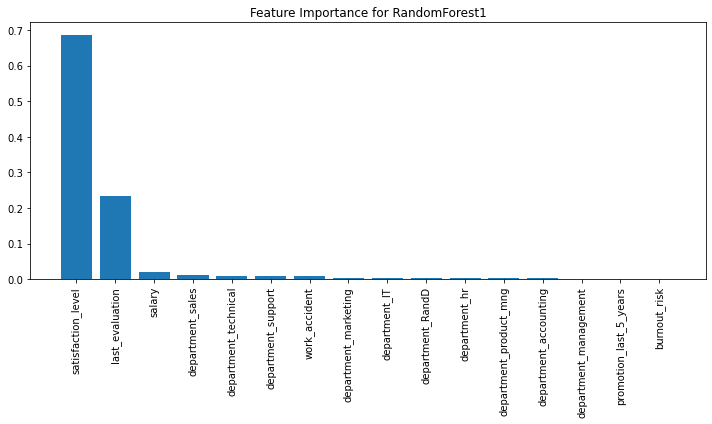

In [93]:
# Get feature importances from the RandomForest model
importances = rf1_cv.best_estimator_.feature_importances_
feature_names = X_test.columns

# Sort the importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance for RandomForest1")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

##### Now lets compare all of the models results

In [94]:
final_results = pd.concat([results, results1, rf1_test_scores ])
final_results

,model,precision,recall,f1,accuracy,F1
0,RF cv,0.983937,0.909298,0.944991,0.982209,NaN
0,XGB cv,0.976518,0.907880,0.940766,0.980777,NaN
0,RF test,0.993197,0.929936,NaN,0.987106,0.960526
0,RF1 cv,0.886565,0.741322,NaN,0.940418,0.807321
0,RF1 test,0.887805,0.772824,NaN,0.945201,0.826334


### Logistic Regression vs Logistic Regresssion 1 Metrics

Logistic Regresssion precision recall f1-score support

Predicted would not leave 0.86 0.93 0.90 2321 Predicted would leave 0.45 0.27 0.34 471

accuracy 0.82 2792 macro avg 0.66 0.60 0.62 2792 weighted avg 0.79 0.82 0.80 2792

Logistic Regression 1 precision recall f1-score support

Predicted would not leave 0.87 0.97 0.92 2321 Predicted would leave 0.63 0.28 0.39 471

accuracy 0.85 2792 macro avg 0.75 0.62 0.65 2792 weighted avg 0.83 0.85 0.83 2792

### Summary of model results

[Double-click to enter your summary here.]

### Logistic regression and Random forest models

• 5 models were implemented: Logistic Regression, Logistic Regression 1 ( with feature engineering ), new variable ( burnout_risk), Random Forest, Random Forest 1 ( including new
variable ), and XGBoost.

• The best recall was 92.99% for the RF model predicting on test data. The best model was
Random Forest, that is why chose that one to predict on test data.

• The model shows a great precision of 99.31%, recall of 92.99% at predicting employees that
would leave, which means that it makes a lot of true positive predictions and capture employees who will leave.

• The recall was even better for the Random Forest model predicting on the test data set. all
of the scores actually improved when predicting on the test data set.

• Without feature engineering, the logistic regression model showed satisfaction_level was by
far the most important feature in the model. It had a negative correlation with employees 
who left; but the recall was very low, 27%, and the time spent at company, also had a big
impact having a positive correlation wth the target variable

• Without feature engineering, the Random Forest model showed that satisfaction_level, was
also the most important feature, havig a recall of 90.92% predicting on the train data and
92.99% predicting on the test data. The recall is the metric used for the Cross Validation
method.

• Approximately 17% of the employees in this dataset left. This is an unbalanced dataset, but
not extremely so. It can be modeled without any class rebalancing.

### Logistic regression and Random forest models with feature engineering

**(burnout_risk):** Combining number_project, time_spend_company, and average_monthly_hours, we created a new feature that flags employees with a high workload (many projects and hours) and shorter tenure, which may indicate burnout.
Logistic Regression vs Logistic Regresssion 1 Metrics

• The recall only improved by 1%, precision increased almost 20% and accuracy increased by
3%.

Random Forest 1

• All of the metrics dropped adding the new variable, precision dropped around 10%, recall
around 16% and accuracy around 4%.

• And it was the same case for the Random Forest 1 model predicting on test data. the metrics
dropped by almost the same percentage compared to the one predicting on train data.

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

### Logistic regression and Random forest models conclusions

• Now, consider which evaluation metric is best. Remember, accuracy might not be the best
gauge of performance because a model can have high accuracy on an imbalanced dataset and
still fail to predict the minority class.

• Logistic regression Even employees that left reached a satisfaction level over 70%. satisfaction
ranges between 20% - 80% approx. employees that stayed show levels 40% - 80%. employees
that left 20% - 70%. Overall the average satisfaction level is lower for employees that left.

• the logisctic regression models showed the higher the average number of projects that the
employee accomplished, the more employees who left.

• The recall for the Random Forest model is 90.92%, which is really good for predicting employees that would leave, with the satisfaction_level feature having a strong negative correlation.

• It would be interesting to know what drives satisfaction_levels, will it have a correlation with
any other variables?

• like in the logistic regression model, the Random Forest Model show that satisfaction_level
is the most important feature. which is probably determined by tenure and number_project
. surprisingly, salary does not have too much weight on the models.

• The model predicted many more times false negatives than it did false positives, and it
correctly identified only 17% of the employees who actually left.

• Also, the target was to identify employees that left, and with an imbalanced data set, with
83% of employees that stayed, vs 17% employees that left, the model identified correctly
17% of employees that actually left; that is why the matrix shows a high proportion of true
negatives. (

• Overall employees stay between 2 to 5 years

• 83% of employees stay vs 17% who left


### Logistic regression and Random forest models conclusions with feature engineering

**(burnout_risk):** Combining number_project, time_spend_company, and average_monthly_hours, we created a new feature that flags employees with a high workload (many projects and hours) and shorter tenure, which may indicate burnout.
Logistic Regression vs Logistic Regresssion 1 Metrics

• Precision improving for the second model, means the model identified more true positives,
although at the same time it identified more false negatives because recall went from 27% to
28%. maybe the new variable (burnout_risk) has a direct correlation with the target variable.

• In the feature importance graph, it looks like burnout_risk has a direct correlation with
employees leaving, showing the highest weight among the independent variables with positive
correlation to the target variable. Meaning that the more projects and hours they work, the
more they are prone to leave. and maybe that could lead to lowest satisfaction levels; which
will make employees leave after 3-5 years of working for the company.

Random Forest 1

• The feature importance graph, showed the satisfaction_level as the most important feature,
and no importance at all on the new variable.


## Overall Conclusion

• The Random forest model without feature engineering has the highest recall of all, 92.99%,
meaning that it is the best at predicting employees that would leave, which means that it
makes a lot of true positive predictions and capture employees who will leave.

• Again, the target was to identify employees that left, and with an imbalanced data set, with
83% of employees that stayed, vs 17% employees that left, the model identified correctly 17%
of employees that actually left;

• On the other hand, the Logistic regression model with the new independent variable,
(burnout_risk), only had a recall of 28%, although the feature importance graph, showed
that, burnout_risk has a strong positive correlation with employees leaving. Meaning that
the more projects and hours they work, the more they are prone to leave. and maybe that
could lead to lowest satisfaction levels; which will make employees leave after 3-5 years of
working for the company.

• As a next step, do more feature engineering to uncover relationships between, motivation
factors, work_life balance, monthly hours, etc., this would help know what determines satisfaction_levels. Maybe gather new data, and make the satisfaction_level feature the target
variable; and compare those results with the older data with the ‘left’ variable as the target
variable. the idea is to know what determines those satisfaction levels with detail.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.